In [8]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab

In [24]:
a=np.random.normal(loc=50,scale=40,size=100000)
a

array([-31.54641108,  85.64154529,  21.62045801, ...,  98.82363566,
        63.54317053,  55.72753346])

C:\Users\cipl\AppData\Local\Temp\ipykernel_11500\3314014589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a);


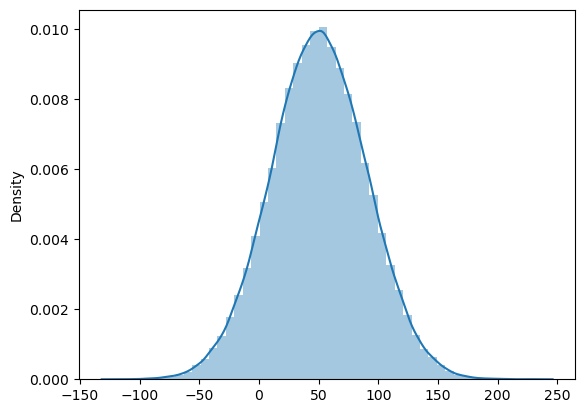

In [25]:
sns.distplot(a);

In [26]:
print(np.mean(a))
print(np.median(a))


50.31085820277087
50.245834203636335


In [27]:
pd.Series(a).skew()


0.0021834278663310784

In [28]:
np.std(a)

40.13153096689373

In [29]:
L=[]
for i in a:
    L.append((i-50.071584904136074)/40.18702918219913)


std_norm=np.array(L)
std_norm

array([-2.03095371,  0.88511047, -0.70796791, ...,  1.21312901,
        0.33522223,  0.14074065])

In [30]:
np.mean(std_norm)

0.005953993203876665

In [31]:
np.std(std_norm)

0.9986190017915039

In [40]:

dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [41]:
np.mean(dataset)

21.176470588235293

In [2]:
(19-21)/26

-0.07692307692307693

In [42]:
np.std(dataset)

26.37230118696876

In [1]:
(107-21.17)/26.37

3.2548350398179746

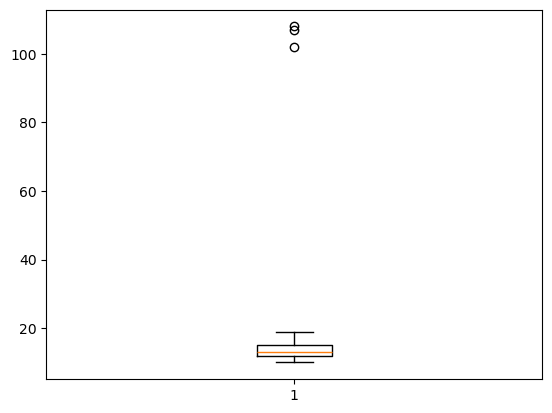

In [44]:
plt.boxplot(dataset);

# Outliers Using Z_score

In [5]:
import numpy as np

In [6]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [7]:

def detect_outliers(data):
    outliers=[]
    threshold=3 #it is the 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        # if np.abs(z_score)>threshold:
        if z_score<-3 or z_score>3:
            outliers.append(i)
    return outliers

detect_outliers(dataset)
           
    

[102, 107, 108]

In [11]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
detect_outliers(df['tip'])

[7.58, 10.0, 9.0]

In [39]:
np.random.seed(47)

# Generate normal distribution data
mean = 50
std_dev = 10
size = 1000
normal_data = np.random.normal(mean, std_dev, size)

# normal_data

In [40]:
# normal_data

In [41]:
# Add outliers
outliers = [mean + 5*std_dev, mean - 5*std_dev, mean + 7*std_dev]
data_with_outliers = np.concatenate([normal_data, outliers])


In [95]:
data_with_outliers

array([ 41.51990524,  63.05906358,  59.24207966, ..., 100.        ,
         0.        , 120.        ])

C:\Users\cipl\AppData\Local\Temp\ipykernel_11500\463616777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_outliers);


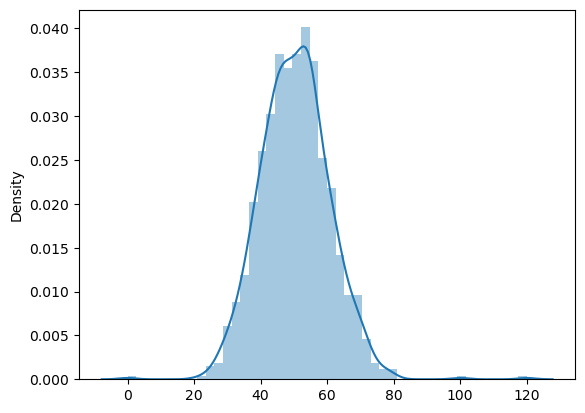

In [42]:
sns.distplot(data_with_outliers);

In [43]:
pd.Series(data_with_outliers).skew()

0.3558374328518293

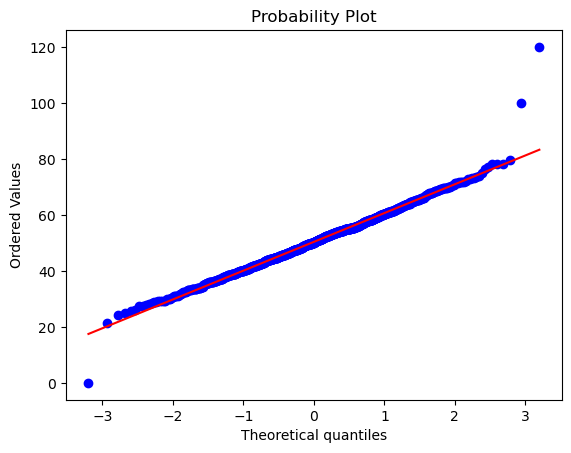

In [44]:
st.probplot(data_with_outliers,dist='norm',plot=pylab);

In [45]:
detect_outliers(data_with_outliers)

[100.0, 0.0, 120.0]

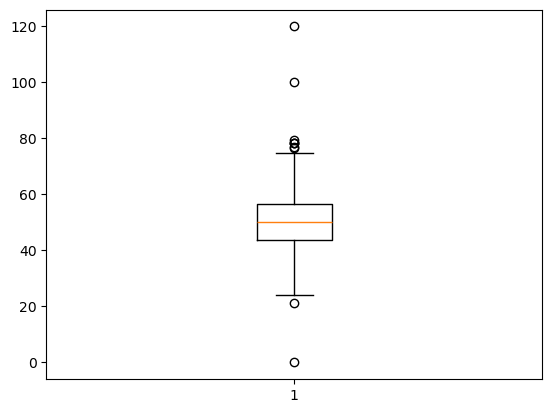

In [101]:
plt.boxplot(data_with_outliers);

In [103]:
np.std(data_with_outliers)

10.363349191094262

In [104]:
(27.53949134-50.38638040510091)/10.363349191094262

-2.2045854717251414

# Log Normal Transformation

In [46]:
from scipy import stats as st
import pylab

In [43]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


C:\Users\cipl\AppData\Local\Temp\ipykernel_11500\2447003164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare']);


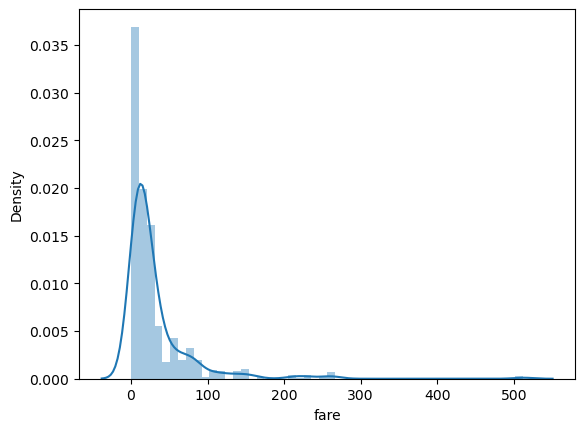

In [48]:
sns.distplot(df['fare']);

In [49]:
df['fare'].skew()

4.787316519674893

In [50]:
print(df['fare'].mean())
print(df['fare'].median())

32.204207968574636
14.4542


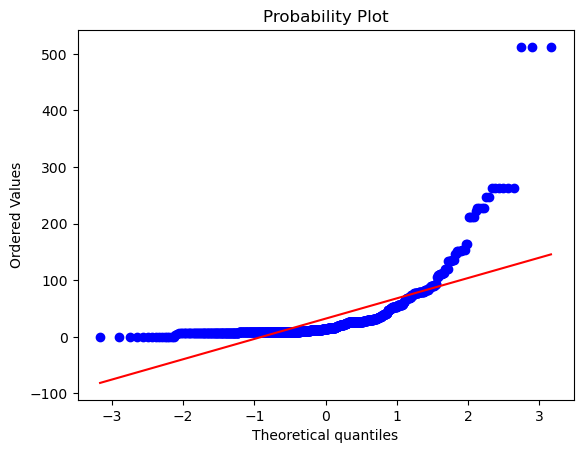

In [51]:
st.probplot(df['fare'],dist='norm',plot=pylab);

In [53]:
from sklearn.preprocessing import FunctionTransformer

In [54]:
t=FunctionTransformer(func=np.log1p)

In [55]:
df['fare1']=t.fit_transform(df['fare'])

In [57]:
# df

C:\Users\cipl\AppData\Local\Temp\ipykernel_11500\842396348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare1']);


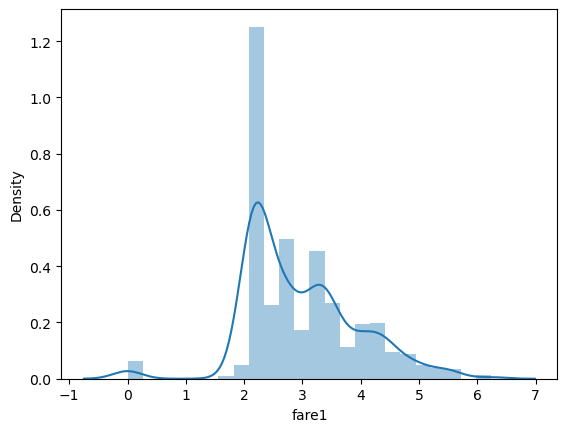

In [58]:
sns.distplot(df['fare1']);

In [59]:
print(df['fare1'].mean())
print(df['fare1'].median())

2.9622457416890815
2.737880811060884


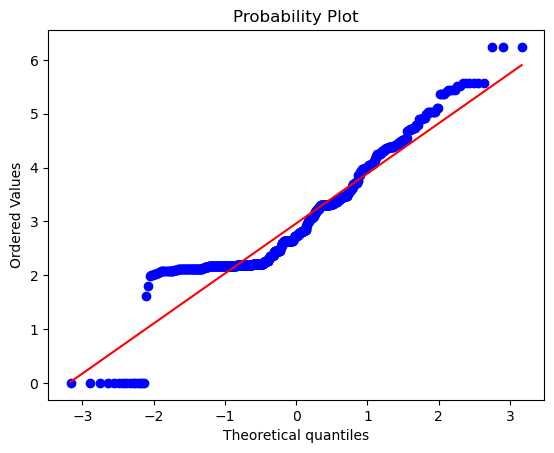

In [60]:
st.probplot(df['fare1'],dist='norm',plot=pylab);

In [61]:
df['fare1'].skew()

0.3949280095189306

# Boxcox

In [2]:
import seaborn as sns

In [3]:
df1=sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\cipl\AppData\Local\Temp\ipykernel_8664\3096280189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['tip']);


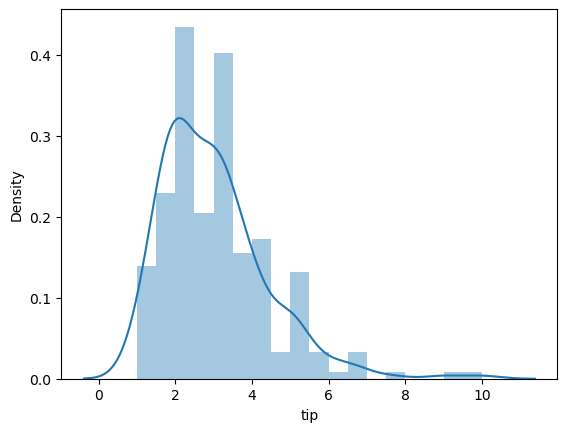

In [4]:
sns.distplot(df1['tip']);

In [64]:
df1['tip'].skew()

1.4654510370979401

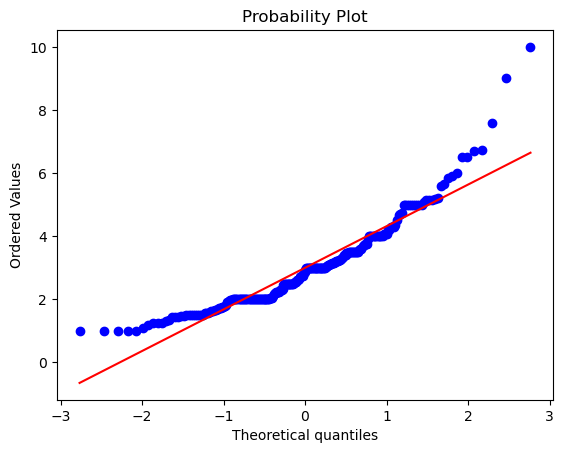

In [65]:
st.probplot(df1['tip'],dist='norm',plot=pylab);


In [70]:
a=st.boxcox(df1['tip'])
a=a[0]
a

array([0.0099472 , 0.49877916, 1.20440831, 1.15275495, 1.23296745,
       1.47615025, 0.67817021, 1.09784802, 0.65882186, 1.13005548,
       0.52749162, 1.5302185 , 0.44470069, 1.06130586, 1.067503  ,
       1.30872802, 0.50459457, 1.25813858, 1.20440831, 1.16388692,
       1.34537493, 0.97991244, 0.78199677, 1.90111462, 1.11556265,
       0.82769459, 0.67817021, 0.67817021, 1.39334353, 1.06130586,
       0.36723077, 0.89024039, 1.06130586, 0.87116324, 1.14147903,
       1.23040965, 0.67817021, 1.08280688, 0.81546181, 1.5302185 ,
       0.78624912, 0.90521229, 1.07976741, 0.27520794, 1.63221079,
       1.06130586, 1.5302185 , 1.6939451 , 0.70178504, 1.06130586,
       0.89024039, 0.92720646, 1.56559869, 0.43848939, 1.40178424,
       1.20704376, 1.06130586, 0.40030927, 0.55532497, 1.79608591,
       1.12428716, 0.67817021, 0.66854798, 1.27045498, 0.94157148,
       1.10675018, 0.87884334, 0.        , 0.68294303, 0.72024013,
       0.66369804, 1.06130586, 1.10379285, 1.5302185 , 0.76911

C:\Users\cipl\AppData\Local\Temp\ipykernel_11500\3314014589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a);


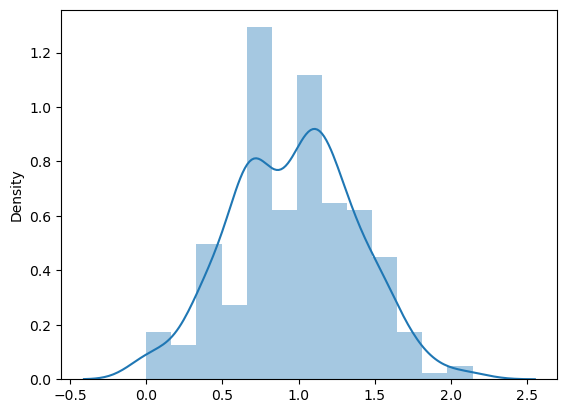

In [71]:
sns.distplot(a);

In [72]:
pd.Series(a).skew()

0.0020415093178724852

In [28]:
b=st.boxcox(df1['tip'])
b=b[0]
b

array([0.0099472 , 0.49877916, 1.20440829, 1.15275494, 1.23296743,
       1.47615023, 0.67817021, 1.09784801, 0.65882185, 1.13005546,
       0.52749161, 1.53021847, 0.44470069, 1.06130584, 1.06750298,
       1.30872801, 0.50459457, 1.25813857, 1.20440829, 1.1638869 ,
       1.34537491, 0.97991243, 0.78199677, 1.90111457, 1.11556264,
       0.82769458, 0.67817021, 0.67817021, 1.39334351, 1.06130584,
       0.36723076, 0.89024038, 1.06130584, 0.87116323, 1.14147901,
       1.23040964, 0.67817021, 1.08280687, 0.81546181, 1.53021847,
       0.78624911, 0.90521228, 1.0797674 , 0.27520793, 1.63221076,
       1.06130584, 1.53021847, 1.69394507, 0.70178503, 1.06130584,
       0.89024038, 0.92720645, 1.56559866, 0.43848939, 1.40178422,
       1.20704374, 1.06130584, 0.40030927, 0.55532496, 1.79608587,
       1.12428715, 0.67817021, 0.66854798, 1.27045496, 0.94157147,
       1.10675017, 0.87884333, 0.        , 0.68294302, 0.72024013,
       0.66369804, 1.06130584, 1.10379283, 1.53021847, 0.76911

C:\Users\verma\AppData\Local\Temp\ipykernel_5884\4219022037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b);


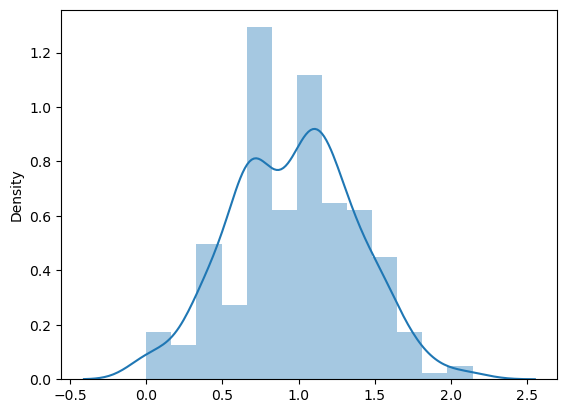

In [29]:
sns.distplot(b);

In [30]:
pd.Series(b).skew()

0.002041483378447799

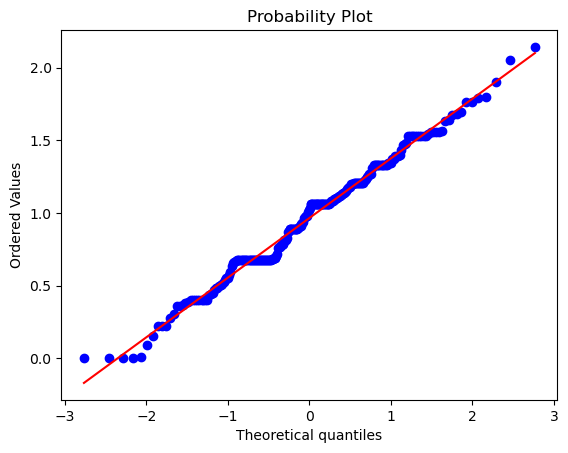

In [73]:
st.probplot(a,dist='norm',plot=pylab);

In [6]:
import pandas as pd

In [15]:
c=pd.DataFrame({'col1':[45,10,20,-10]})
c

,col1
0,45
1,10
2,20
3,-10


In [16]:
from scipy import stats as st

In [17]:
st.boxcox(c['col1'])

ValueError: Data must be positive.

In [23]:
pt=PowerTransformer()
pt.fit_transform(c[['col1']])

array([[ 1.36494641],
       [-0.2060337 ],
       [ 0.2640281 ],
       [-1.42294081]])

# yeojohnson

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pt=PowerTransformer()

In [26]:
df1['tip1']=pt.fit_transform(df1[['tip']])

C:\Users\cipl\AppData\Local\Temp\ipykernel_8664\1491450427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['tip1']);


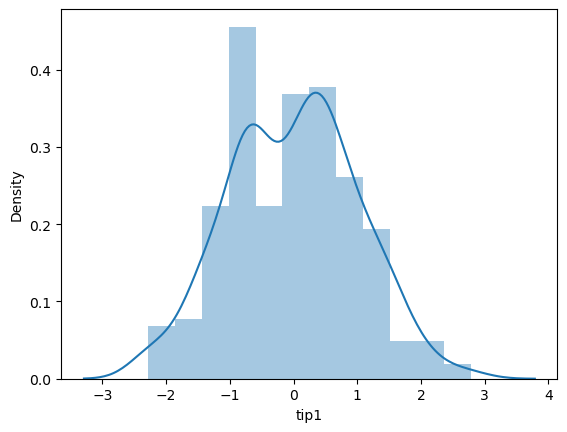

In [27]:
sns.distplot(df1['tip1']);

In [28]:
df1['tip1'].skew()

0.016092053268248783

In [31]:
d=df1.iloc[:,:2]
d

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [38]:
import numpy as np

In [40]:
df1

,total_bill,tip,sex,smoker,day,time,size,tip1
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.268391
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.156975
2,21.01,3.50,Male,No,Sun,Dinner,3,0.594096
3,23.68,3.31,Male,No,Sun,Dinner,2,0.465097
4,24.59,3.61,Female,No,Sun,Dinner,4,0.665257
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.755989
240,27.18,2.00,Female,Yes,Sat,Dinner,2,-0.720096
241,22.67,2.00,Male,Yes,Sat,Dinner,2,-0.720096
242,17.82,1.75,Male,No,Sat,Dinner,2,-1.033811


In [39]:
df1.select_dtypes(include=np.number)

,total_bill,tip,size,tip1
0,16.99,1.01,2,-2.268391
1,10.34,1.66,3,-1.156975
2,21.01,3.50,3,0.594096
3,23.68,3.31,2,0.465097
4,24.59,3.61,4,0.665257
...,...,...,...,...
239,29.03,5.92,3,1.755989
240,27.18,2.00,2,-0.720096
241,22.67,2.00,2,-0.720096
242,17.82,1.75,2,-1.033811


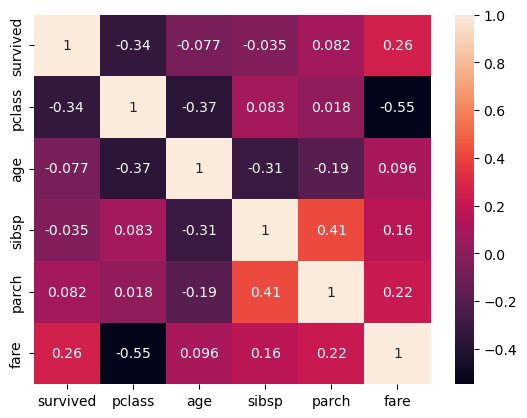

In [44]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True);

In [42]:
df

NameError: name 'df' is not defined